<a href="https://colab.research.google.com/github/LucasTCook/Tensorflow-deep-learning-intro/blob/master/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

### Neural Network Classifications

A few types of classificatoin problems:
* **Binary Classification**: Classifying data into two distinct groups.
* **Multiclass Classification:** Classifying data into more than two, mutually exclusive classes.
* **Multilabel Classification**: Assigning multiple labels to each data instance.


## Creating data to view and fit

**Binary Classification Example**

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is hard to understand in this form, let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


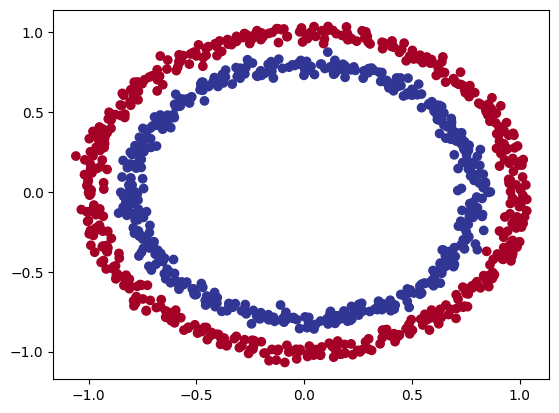

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

[TensorFlow Playground](https://playground.tensorflow.org/)

In [ ]:
# Check the shapes of our features and samples
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples are we working with
len(X), len(y)

(1000, 1000)

In [ ]:
#View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create the model or import the model
2. Compile the model
3. Fit the model
4. Evaluate
5. Tweak
6. Evaluate
...

In [ ]:
import tensorflow as tf

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy, # new loss function
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X,y, epochs=5)


Epoch 1/5


32/32 [==============================] - 1s 878us/step - loss: 1.8014 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 613us/step - loss: 0.7277 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 581us/step - loss: 0.7041 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 549us/step - loss: 0.6972 - accuracy: 0.5050
Epoch 5/5
32/32 [==============================] - 0s 581us/step - loss: 0.6953 - accuracy: 0.4990


In [ ]:
# Lets try and improve out model by training for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 581us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and out model is getting around 50% accuracy, its performing as if it is guessing.

Lets try and add a layer and run it for 200 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X,y,epochs=200,verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 581us/step - loss: 0.6935 - accuracy: 0.5000


[0.693528413772583, 0.5]

Our model is still getting guessing results even with 2 layers.



## Improving our model

1. **Create the model or import the model** - we might add more layers or increase the number of hidden units within a layer.
2. **Compile the model** - we might chose a different optimization function such as Adam instead of SGD
3. **Fit the model** - we might fit our model for more epochs
4. **Evaluate**
5. **Tweak**
6. **Evaluate and repeat**

Ways to improve:
> 1. Adding Layers
> 2. Increase the number of hidden units
> 3. Change the activation functions
> 4. Change the optimization function
> 5. Change the learning rate
> 6. Fitting on more data
> 7. Fitting for longer

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # Change to Adam
    metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(X,y,epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 613us/step - loss: 0.6944 - accuracy: 0.5000


[0.6943965554237366, 0.5]

**Adding another layer and increasing hidden units did not work**

To visualize our model's predictions, let's create a function `plot_decision_boundary()`

This function will:
* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions accross the meshgrid
* Plot the predictions as well as a line between the different zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() -0.1, X[:,1].max() + 0.1

  #Create the meshgrid
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))

  # Create X value (to make predictions on)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together into 1D

  # Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 481us/step
doing binary classification


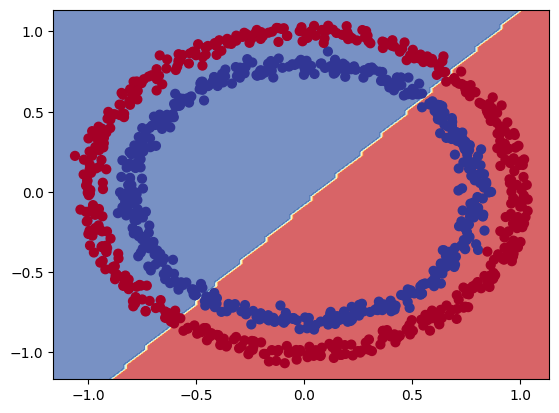

In [ ]:
#Check out the predictions out model is making
plot_decision_boundary(
    model=model_3,
    X=X,
    y=y)

In [ ]:
# Lets see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X+100

# Split out regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

STOP... We compiled out model for a binary classification problem,

We are now working in a regression problem, lets change the model to suit the regression data.

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, but this time with a regression specific loss function
model_3_reg.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(), # Change to Adam
    metrics=["mae"]
)

# 3. Fit the model
model_3_reg.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100, verbose=0)

2/2 [==============================] - 0s 2ms/step


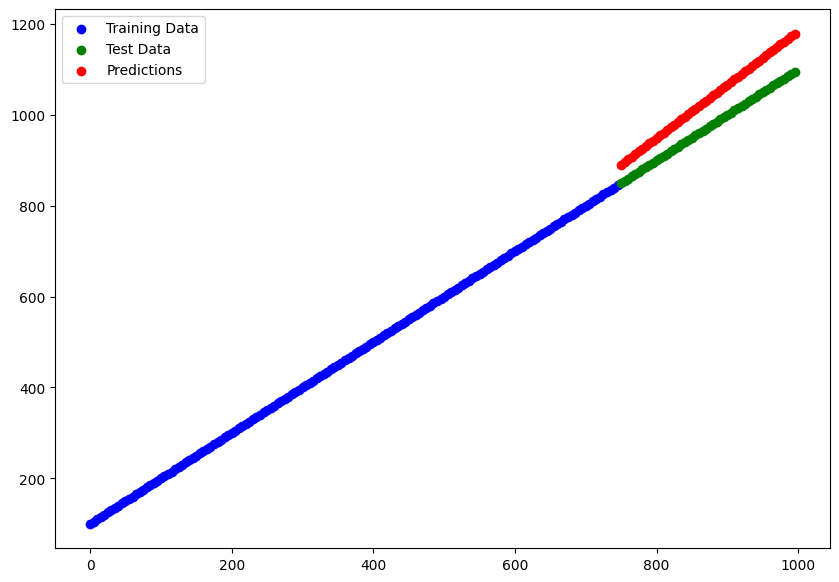

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3_reg.predict(X_reg_test)

# PLot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: **Non-linearity**

In [ ]:
# Recreating a linear activations example created in TensorFlow playground

#Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile our model
model_4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit our model
history_4 = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 710us/step - loss: 4.3952 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 613us/step - loss: 4.3777 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 581us/step - loss: 4.3569 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 613us/step - loss: 4.3464 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 581us/step - loss: 4.3394 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 597us/step - loss: 4.3331 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 581us/step - loss: 4.2976 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 581us/step - loss: 4.2542 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 581us/step - loss: 4.2273 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 581us/step - loss: 4.1973 - accura

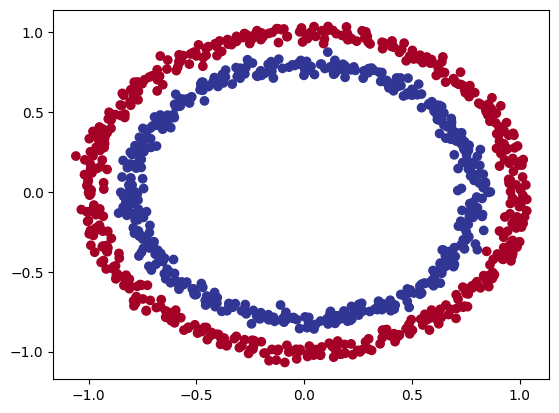

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 439us/step
doing binary classification


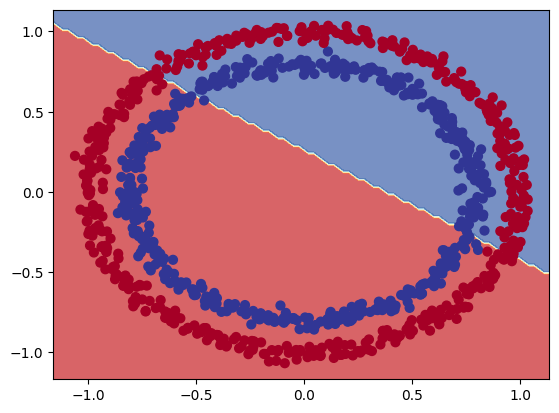

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(
    model=model_4,
    X=X,
    y=y
)

Let's try to build out first neural network with a non-linear activation function

In [ ]:
# set seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_5 = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 723us/step - loss: 4.6885 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 668us/step - loss: 4.5477 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 647us/step - loss: 4.5379 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 600us/step - loss: 4.5313 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 652us/step - loss: 4.5017 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 551us/step - loss: 4.4682 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 553us/step - loss: 4.4383 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 598us/step - loss: 4.4308 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 646us/step - loss: 4.4252 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 565us/step - loss: 4.4208 - accura

313/313 [==============================] - 0s 476us/step
doing binary classification


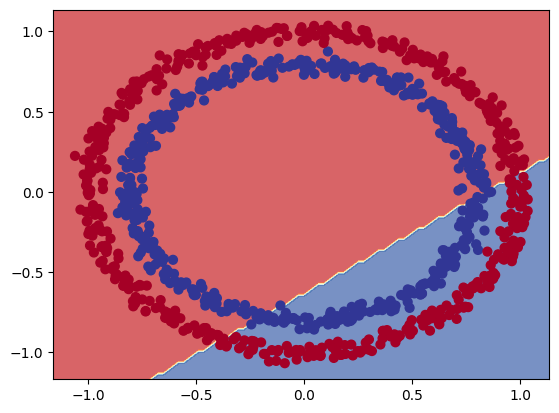

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(
    model=model_5,
    X=X,
    y=y
)

In [46]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code

#set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
history_6 = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 761us/step - loss: 1.0791 - accuracy: 0.3880
Epoch 2/250
32/32 [==============================] - 0s 697us/step - loss: 0.9104 - accuracy: 0.4060
Epoch 3/250
32/32 [==============================] - 0s 663us/step - loss: 0.8757 - accuracy: 0.4050
Epoch 4/250
32/32 [==============================] - 0s 684us/step - loss: 0.8514 - accuracy: 0.4080
Epoch 5/250
32/32 [==============================] - 0s 713us/step - loss: 0.8298 - accuracy: 0.3910
Epoch 6/250
32/32 [==============================] - 0s 677us/step - loss: 0.8108 - accuracy: 0.3940
Epoch 7/250
32/32 [==============================] - 0s 664us/step - loss: 0.7950 - accuracy: 0.4050
Epoch 8/250
32/32 [==============================] - 0s 682us/step - loss: 0.7824 - accuracy: 0.3960
Epoch 9/250
32/32 [==============================] - 0s 664us/step - loss: 0.7701 - accuracy: 0.3900
Epoch 10/250
32/32 [==============================] - 0s 709us/step - loss: 0.7601 - accura

In [47]:
# Evalute the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 634us/step - loss: 0.0545 - accuracy: 0.9860


[0.054535526782274246, 0.9860000014305115]

313/313 [==============================] - 0s 474us/step
doing binary classification


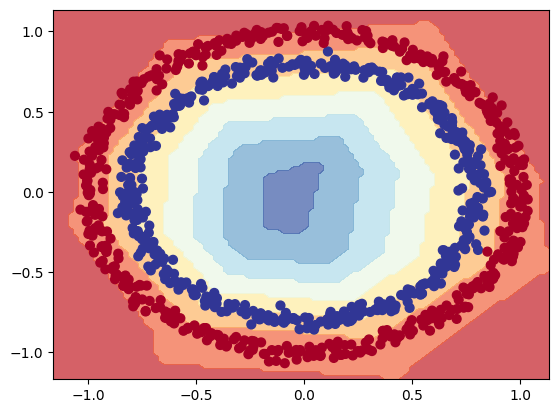

In [48]:
# How do our model predictions look
plot_decision_boundary(model_6,X,y)

In [66]:
# Lets change the activation of output layer

#set seed
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    # tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1, activation="softmax") # change to softmax activation for the output layer
    tf.keras.layers.Dense(1, activation="sigmoid") # Change the activation to sigmoid
])

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)


# 3. Fit the model
history_7 = model_7.fit(X,y,epochs=250)


Epoch 1/250
32/32 [==============================] - 0s 739us/step - loss: 0.7978 - accuracy: 0.4990
Epoch 2/250
32/32 [==============================] - 0s 649us/step - loss: 0.7610 - accuracy: 0.4920
Epoch 3/250
32/32 [==============================] - 0s 678us/step - loss: 0.7386 - accuracy: 0.4870
Epoch 4/250
32/32 [==============================] - 0s 630us/step - loss: 0.7253 - accuracy: 0.4930
Epoch 5/250
32/32 [==============================] - 0s 629us/step - loss: 0.7170 - accuracy: 0.4940
Epoch 6/250
32/32 [==============================] - 0s 613us/step - loss: 0.7108 - accuracy: 0.4900
Epoch 7/250
32/32 [==============================] - 0s 631us/step - loss: 0.7076 - accuracy: 0.4910
Epoch 8/250
32/32 [==============================] - 0s 646us/step - loss: 0.7060 - accuracy: 0.4860
Epoch 9/250
32/32 [==============================] - 0s 607us/step - loss: 0.7044 - accuracy: 0.4850
Epoch 10/250
32/32 [==============================] - 0s 646us/step - loss: 0.7034 - accura

In [67]:
# Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 572us/step - loss: 0.0574 - accuracy: 0.9980


[0.057361308485269547, 0.9980000257492065]

313/313 [==============================] - 0s 467us/step
doing binary classification


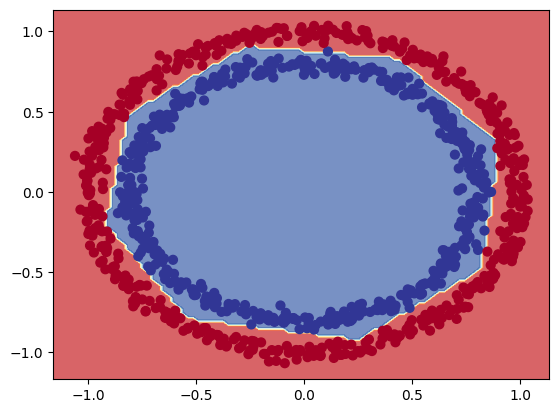

In [68]:
# Lets visualize this AWESOME adjustment

plot_decision_boundary(
    model=model_7,
    X=X,
    y=y
)

❓❓❓ **Question** Whats wrong with the predictions we made?

**ANSWER:** We trained and tested on the same dataset


🗝️ **NOTE:** The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks.